In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
import joblib
import os

In [2]:
df = pd.read_excel('Датасет.xlsx')

## Preprocessing

In [3]:
def prep(data):
    data.fillna(df.mean(),inplace=True)
    data['day'] = data['Date'].dt.day
    data['weekday'] = (data['Date'].dt.dayofweek < 5).astype(int)
    data['weekend'] = (data['Date'].dt.dayofweek >= 5).astype(int)
    data['month'] = data['Date'].dt.month
    
    return data

In [4]:
df =prep(df)

In [6]:
df

,Date,Бульвар Рокоссовского,Черкизовская,Преображенская пл,Сокольники Сокольническая,Красносельская,Комсомольская Скольническая,Красные ворота,Чистые пруды,Лубянка,...,Пыхтино,Аэропорт Внуково,Яхромская,Лианозово,Физтех,Текстильщики БКЛ.1,day,weekday,weekend,month
0,2024-01-01,16671,6248,14094,18651,7391,8883,3067,12873,8554,...,8390,15787,9813,18978,1476,18055,1,1,0,1
1,2024-01-02,15113,5441,1132,10083,19339,15442,7139,11038,15482,...,16045,10257,19663,8499,2893,18422,2,1,0,1
2,2024-01-03,2905,7991,6556,6488,15424,15055,18002,2430,6545,...,18903,13493,12491,2959,9897,14815,3,1,0,1
3,2024-01-04,13998,14864,7265,6409,10725,2531,19411,18152,10221,...,13176,8656,9180,12203,9793,16915,4,1,0,1
4,2024-01-05,12742,10015,4001,9446,5965,7285,9990,7456,9020,...,16827,5761,3563,9070,9822,6052,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2024-03-30,13714,6496,8365,18759,7746,5709,1873,15867,4428,...,14040,19801,14759,5616,3834,13438,30,0,1,3
90,2024-03-31,2561,15991,2811,5573,8936,15712,2772,11590,10987,...,10988,17569,14798,16496,5997,7997,31,0,1,3
91,2024-04-01,11209,7029,5004,15017,11373,5649,10104,4453,5127,...,8035,13950,17189,8603,5933,10796,1,1,0,4
92,2024-04-02,2722,3999,17068,14176,19561,4700,3868,14364,15485,...,11124,7545,3864,16046,4969,11741,2,1,0,4


##  Train
`

### LinearReg

MAPE for Бульвар Рокоссовского: 1.7762359957224447
MAPE for Черкизовская: 0.7213099699281947
MAPE for Преображенская пл: 0.7648979935866523
MAPE for Сокольники Сокольническая: 0.49014206742672595


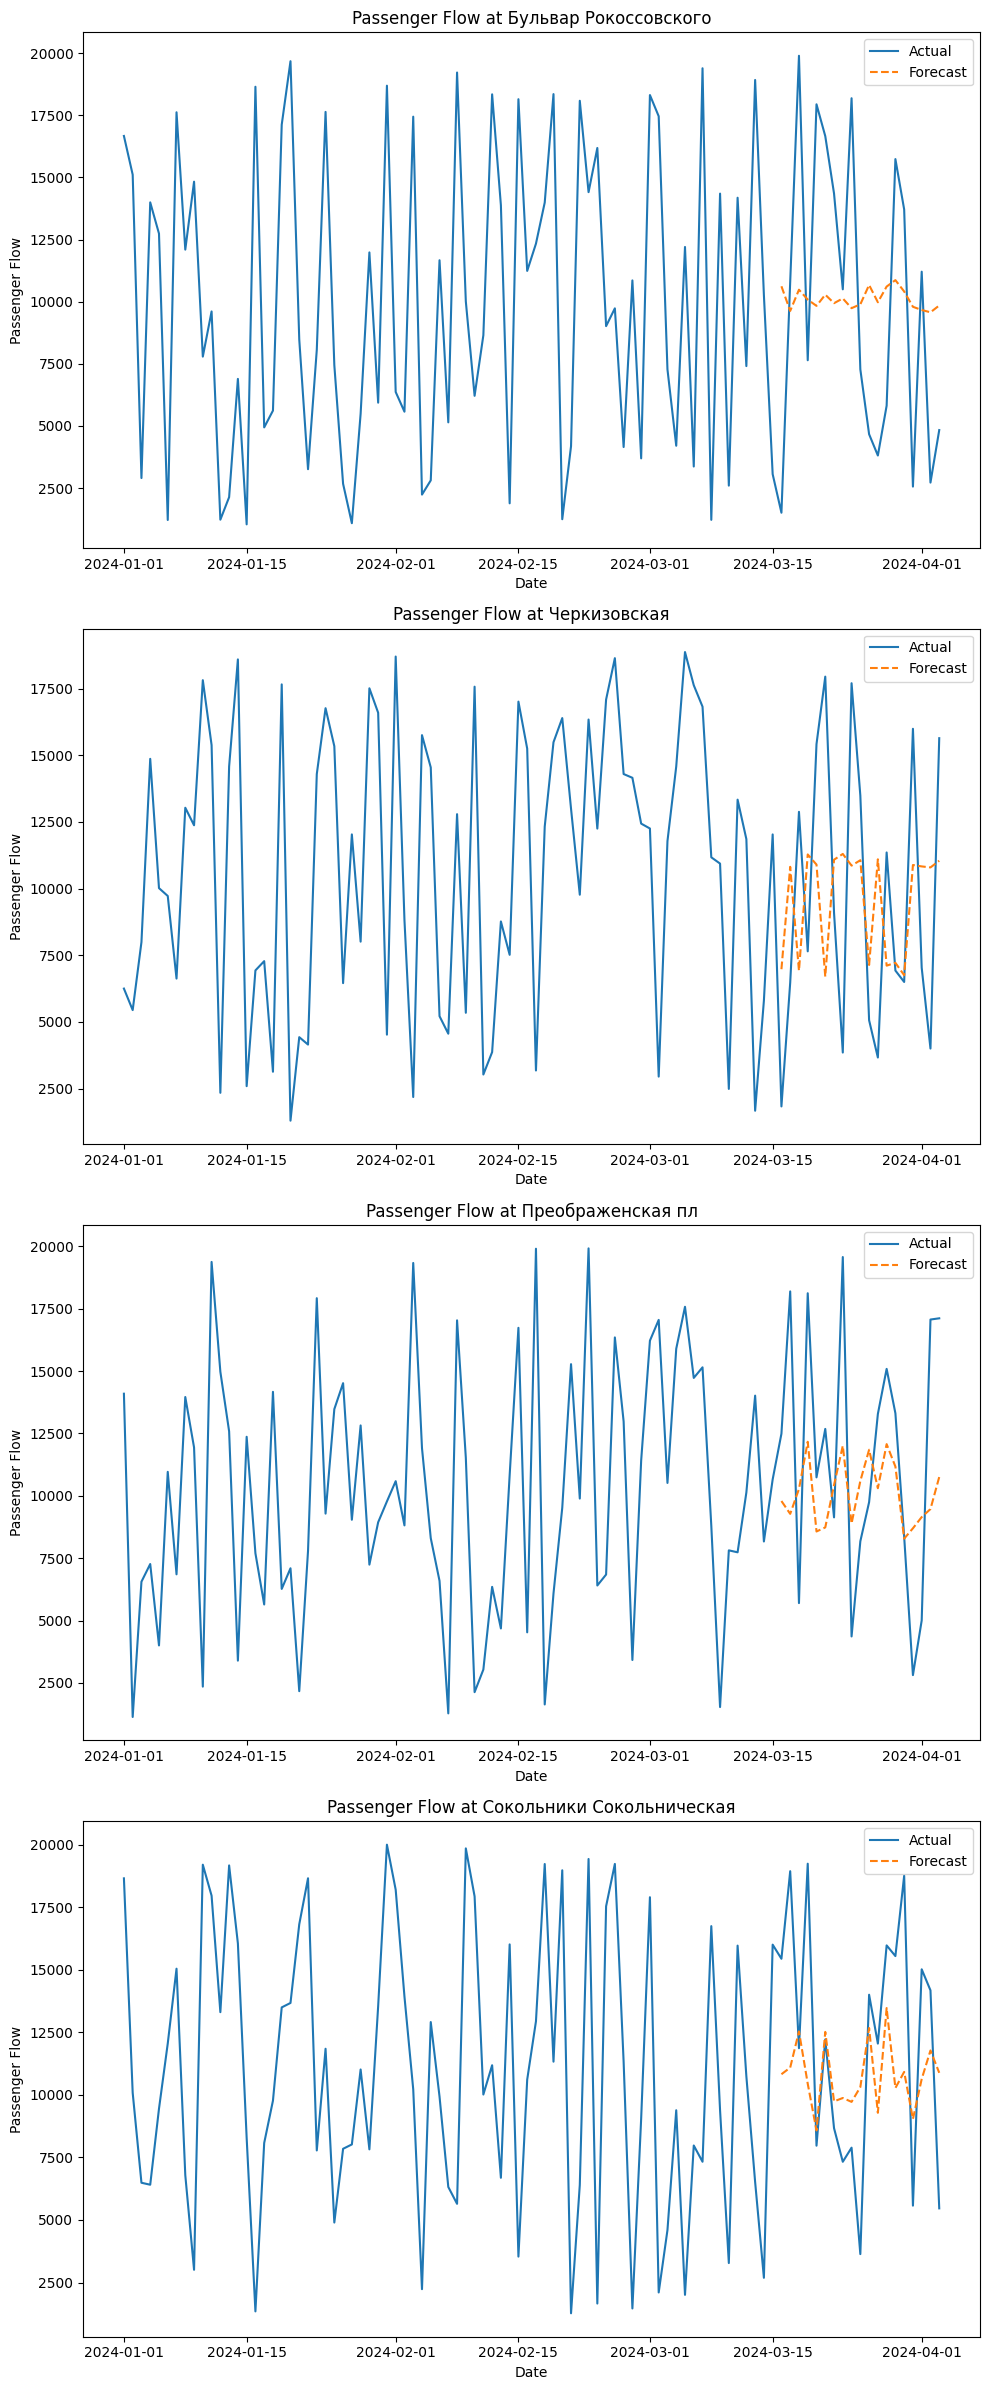

In [7]:

stations = df.columns[1:5]  


fig, axes = plt.subplots(len(stations), figsize=(10, 6*len(stations)))


for i, station in enumerate(stations):
   
    X = df[['day','weekday','weekend','month']]  
    y = df[station]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)



    y_pred = model.predict(X_test)

    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"MAPE for {station}: {mape}")


    axes[i].plot(df['Date'], y, label='Actual')
    axes[i].plot(df['Date'][-len(y_pred):], y_pred, label='Forecast',linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()


plt.tight_layout()

plt.show()


### RandomForest

MAPE for Бульвар Рокоссовского: 0.5155091049946471
MAPE for Черкизовская: 0.5174016001981062
MAPE for Преображенская пл: 0.5099826129231522
MAPE for Сокольники Сокольническая: 0.5269758947377362


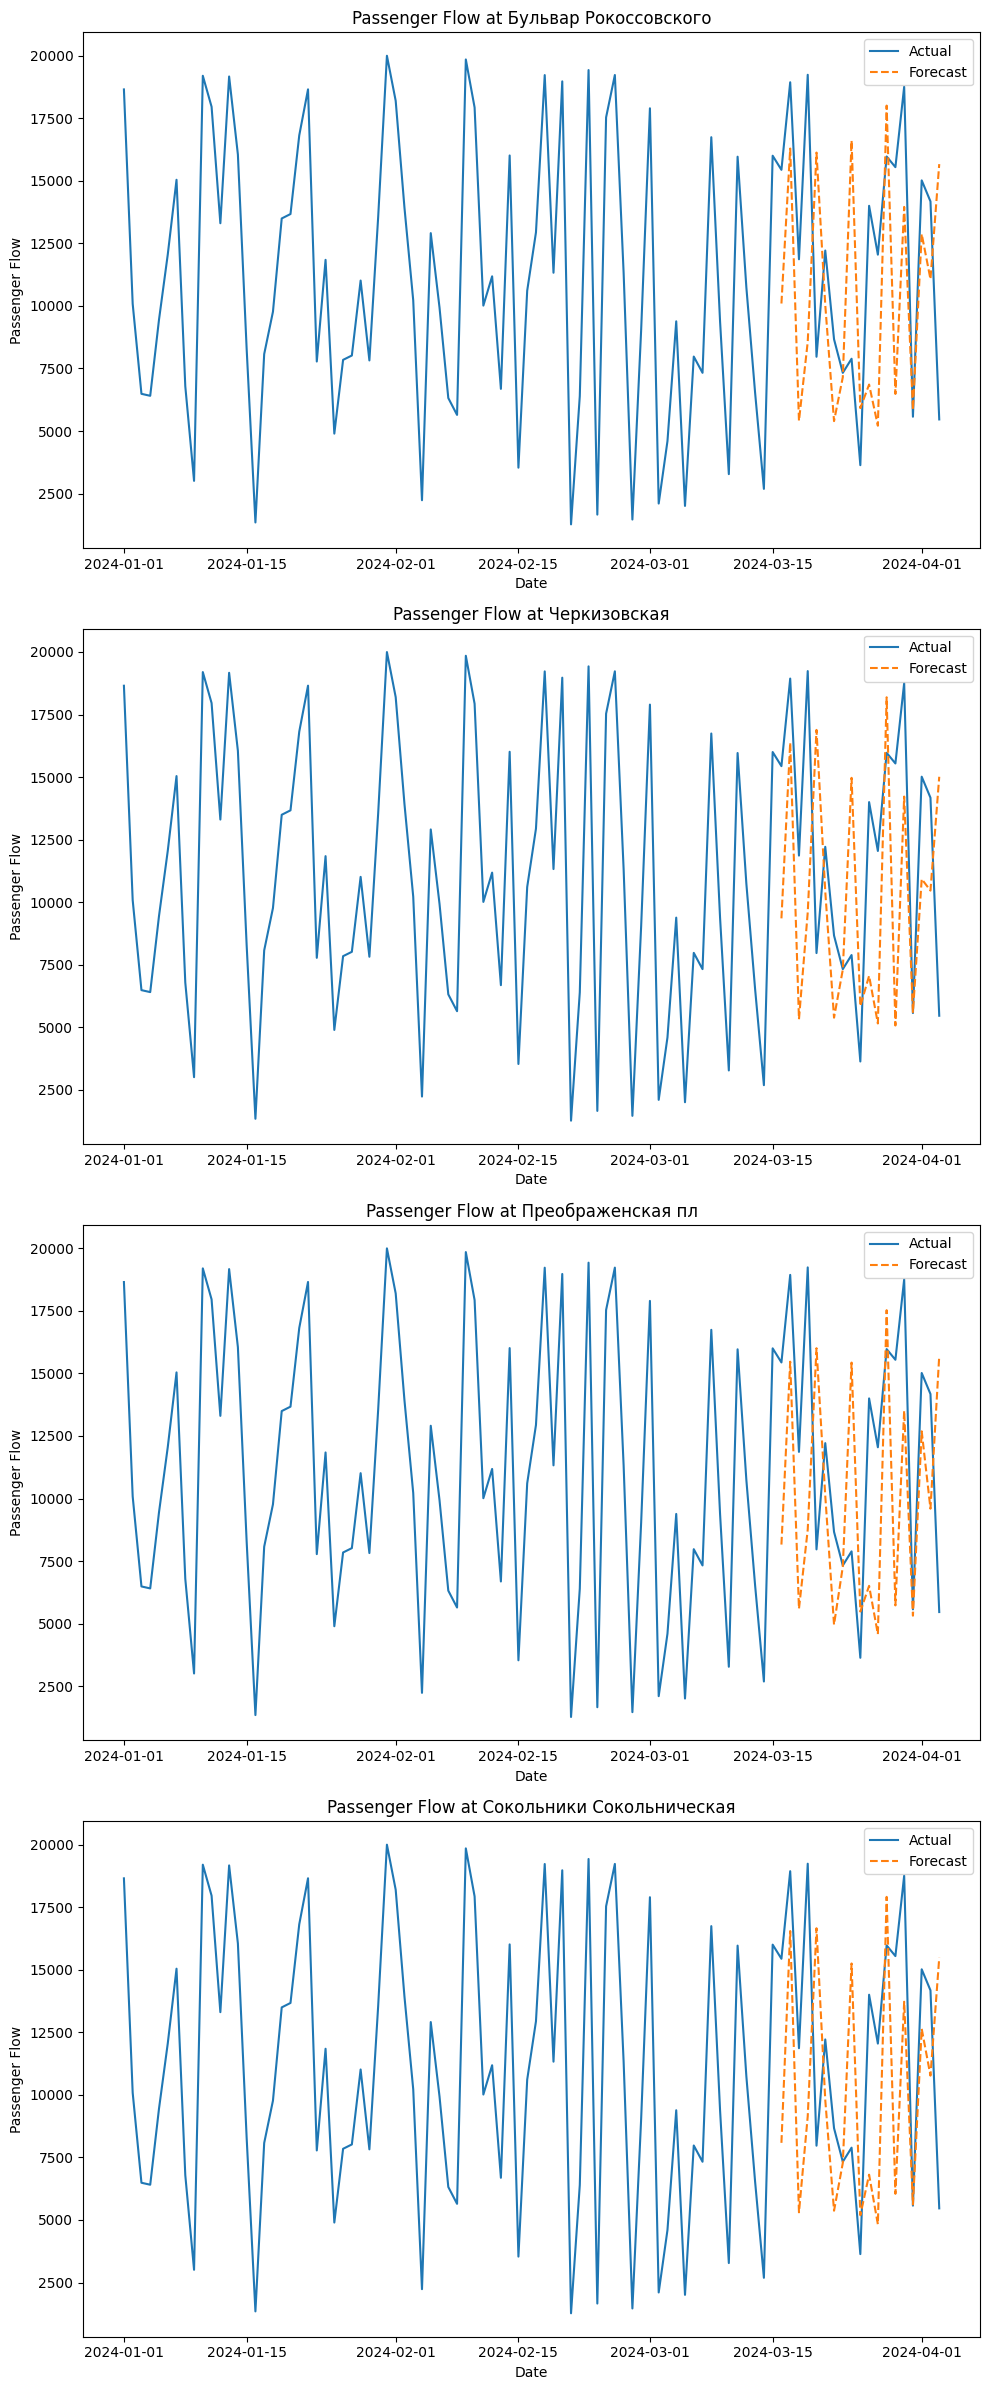

In [8]:
stations = df.columns[1:5]  


fig, axes = plt.subplots(len(stations), figsize=(10, 6*len(stations)))

for i, station in enumerate(stations):

    X = df[['day','weekday','weekend','month']]  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    model = RandomForestRegressor()
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"MAPE for {station}: {mape}")

    axes[i].plot(df['Date'], y, label='Actual')
    axes[i].plot(df['Date'][-len(y_pred):], y_pred, label='Forecast', linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()

plt.tight_layout()

plt.show()


### CatBoost

Learning rate set to 0.027192
0:	learn: 5916.5647233	total: 152ms	remaining: 2m 31s
1:	learn: 5901.9873571	total: 153ms	remaining: 1m 16s
2:	learn: 5891.7887165	total: 153ms	remaining: 50.8s
3:	learn: 5890.1527478	total: 153ms	remaining: 38.1s
4:	learn: 5889.8356997	total: 153ms	remaining: 30.5s
5:	learn: 5879.0094515	total: 154ms	remaining: 25.5s
6:	learn: 5876.1747789	total: 154ms	remaining: 21.8s
7:	learn: 5856.8521776	total: 154ms	remaining: 19.2s
8:	learn: 5856.5709406	total: 155ms	remaining: 17s
9:	learn: 5846.6522879	total: 155ms	remaining: 15.3s
10:	learn: 5836.3937531	total: 155ms	remaining: 14s
11:	learn: 5827.8005146	total: 156ms	remaining: 12.8s
12:	learn: 5826.1886240	total: 156ms	remaining: 11.8s
13:	learn: 5818.1883835	total: 156ms	remaining: 11s
14:	learn: 5812.1144741	total: 157ms	remaining: 10.3s
15:	learn: 5810.4781549	total: 157ms	remaining: 9.65s
16:	learn: 5805.8841960	total: 157ms	remaining: 9.09s
17:	learn: 5803.0034280	total: 157ms	remaining: 8.59s
18:	learn: 5

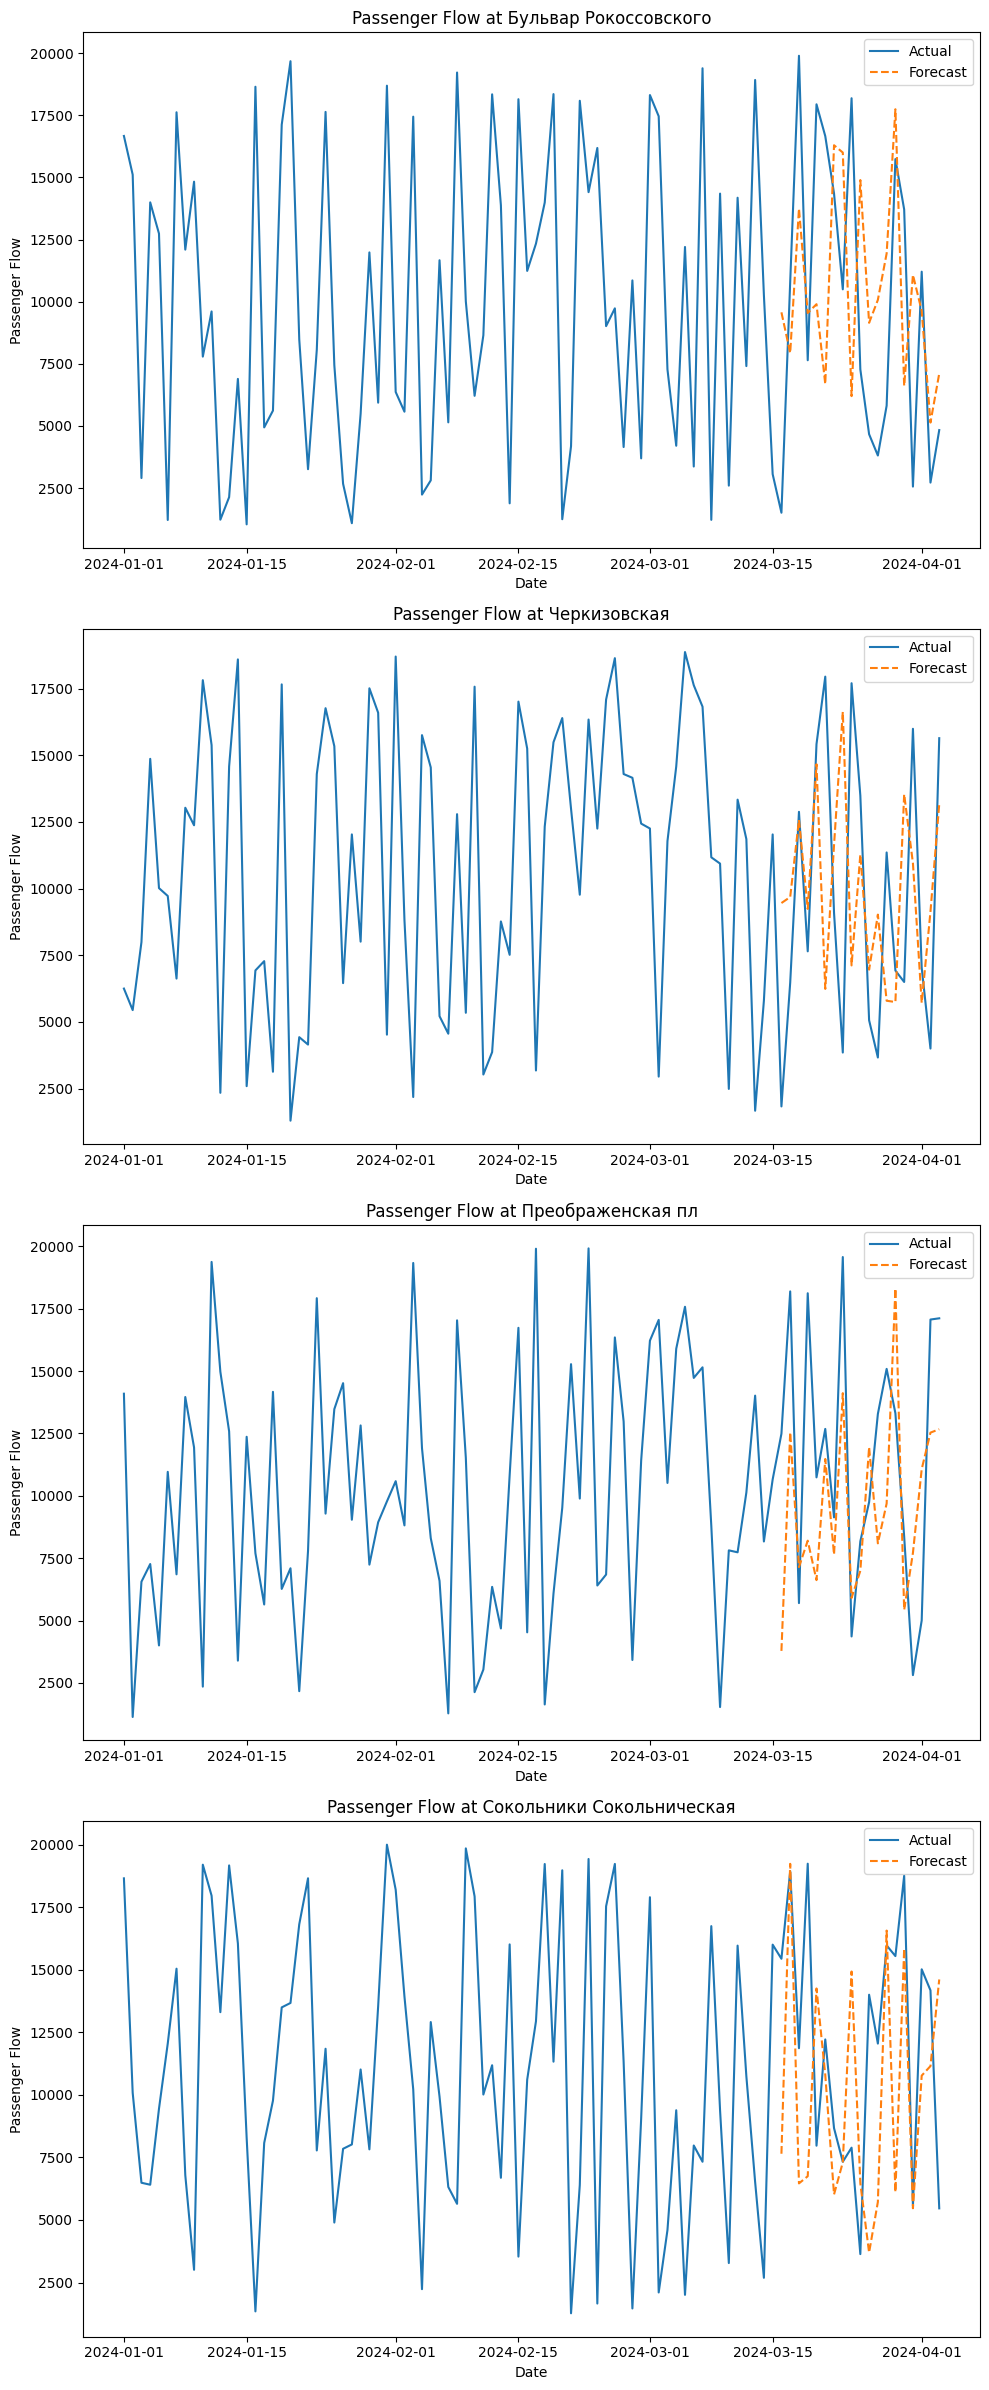

In [9]:
stations = df.columns[1:5]  
fig, axes = plt.subplots(len(stations), figsize=(10, 6*len(stations)))

for i, station in enumerate(stations):
   
    X = df[['day','weekday','weekend','month']]  
    y = df[station]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = CatBoostRegressor()
    model.fit(X_train, y_train)



    y_pred = model.predict(X_test)


    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"MAPE for {station}: {mape}")

    axes[i].plot(df['Date'], y, label='Actual')
    axes[i].plot(df['Date'][-len(y_pred):], y_pred, label='Forecast', linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()



# Размещение графиков
plt.tight_layout()

plt.show()


### XGBoost

MAPE for Бульвар Рокоссовского: 2.2278327409096463
MAPE for Черкизовская: 0.7852261188898684
MAPE for Преображенская пл: 0.6938633129268721
MAPE for Сокольники Сокольническая: 0.7070898863823231


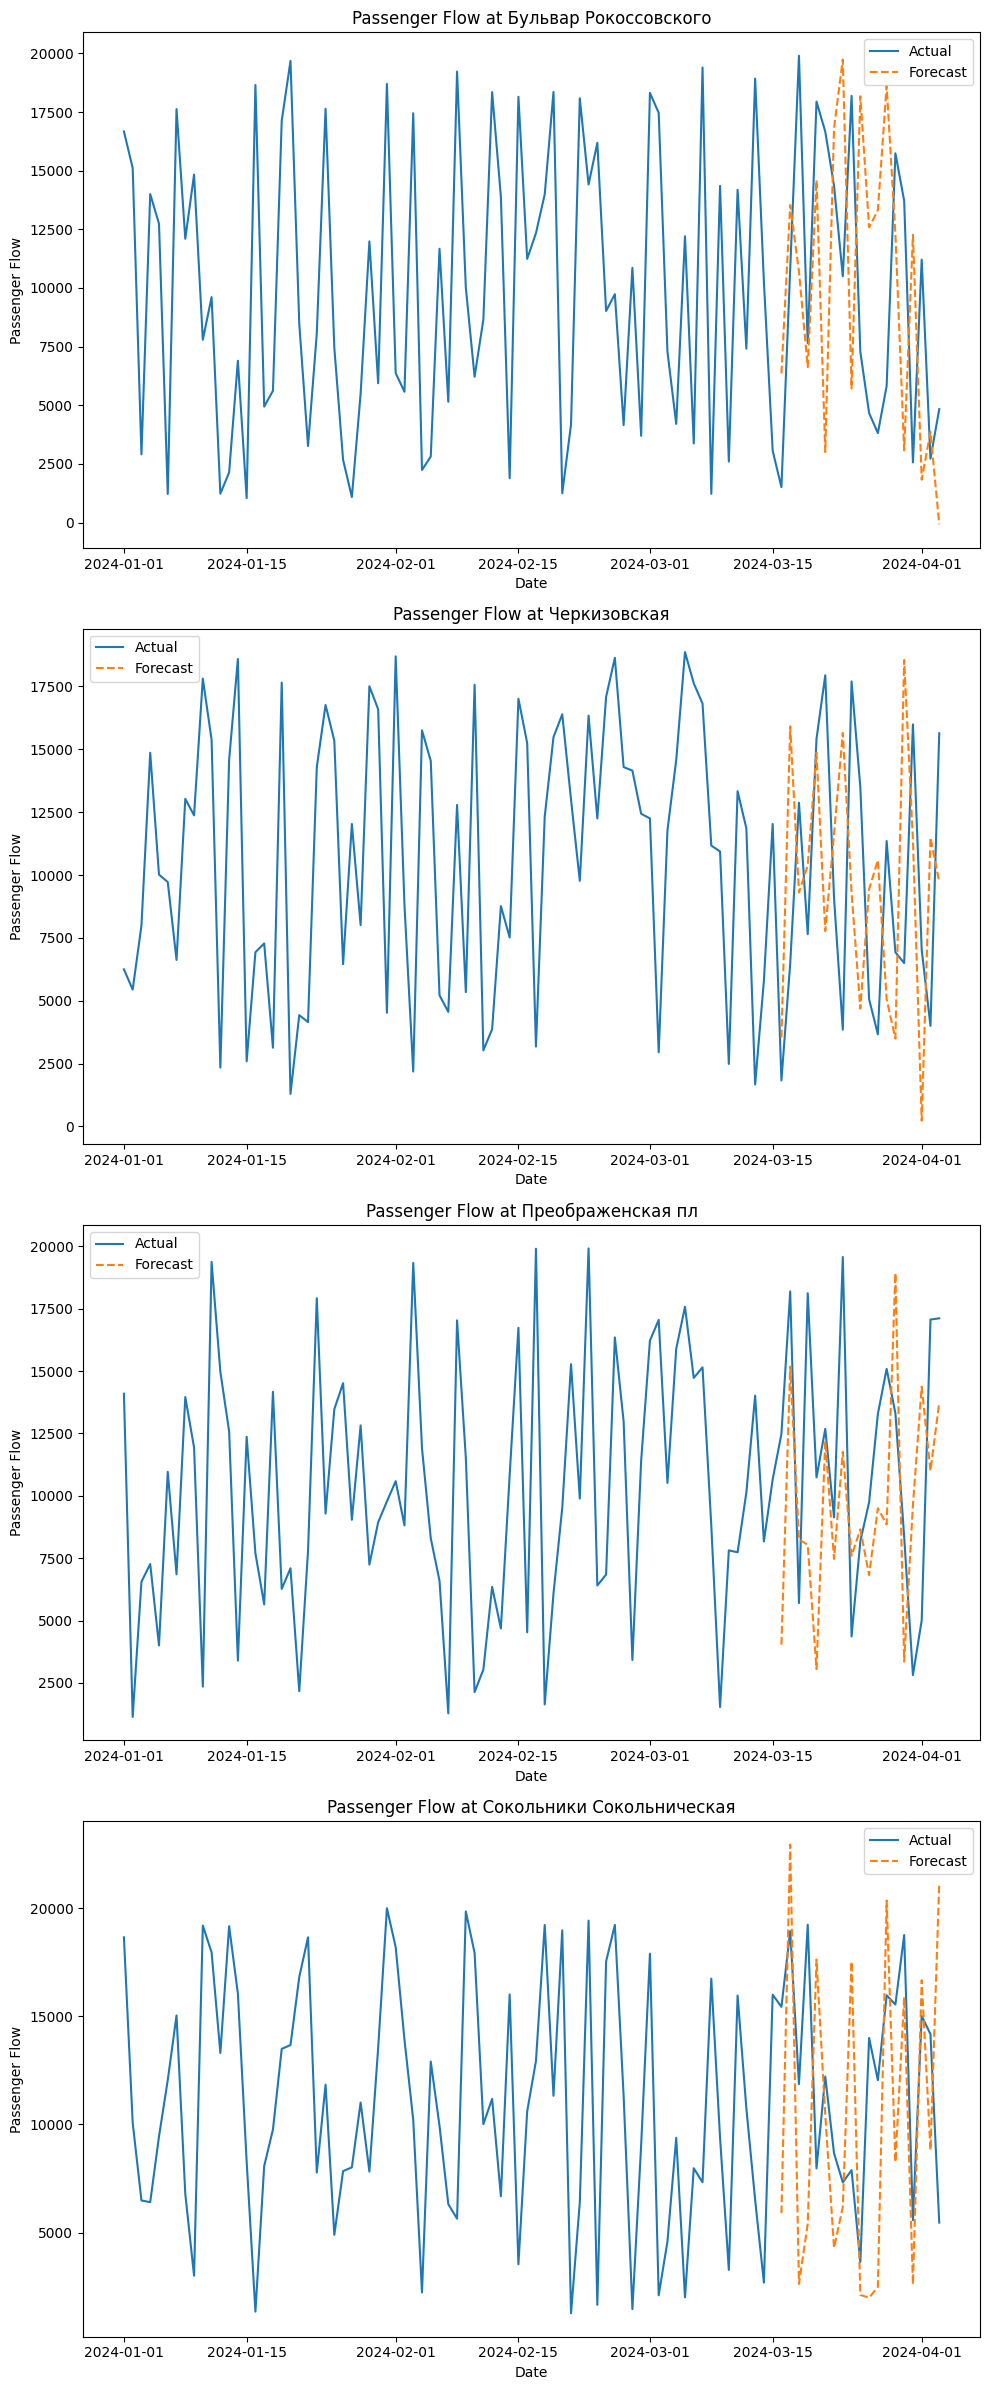

In [10]:


stations = df.columns[1:5]  

station_models={}

fig, axes = plt.subplots(len(stations), figsize=(10, 6*len(stations)))


for i, station in enumerate(stations):

    X = df[['day','weekday','weekend','month']]  
    y = df[station]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBRegressor()
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

    
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"MAPE for {station}: {mape}")

    axes[i].plot(df['Date'], y, label='Actual')
    axes[i].plot(df['Date'][-len(y_pred):], y_pred, label='Forecast', linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()

    station_models[station] = model


plt.tight_layout()

plt.show()


In [11]:
for station in stations:
    
    X = df[['day','weekday','weekend','month']]  
    y = df[station]

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print('-'*50)
    print(station)
    print("Линейка")
    model1 = LinearRegression()
    model1.fit(X_train,y_train)
    print(mean_absolute_percentage_error(y_test,model1.predict(X_test)))
    print("Лес")
    model2 = RandomForestRegressor()
    model2.fit(X_train,y_train)
    print(mean_absolute_percentage_error(y_test,model2.predict(X_test)))
    print("Коты")
    model3 = CatBoostRegressor(verbose=0)
    model3.fit(X_train,y_train)
    print(mean_absolute_percentage_error(y_test,model3.predict(X_test)))
    print("XGBoost")
    model4 = XGBRegressor()
    model4.fit(X_train,y_train)
    print(mean_absolute_percentage_error(y_test,model4.predict(X_test)))
    print("LightGB")
    model4 = LGBMRegressor()
    model4.fit(X_train,y_train)
    print(mean_absolute_percentage_error(y_test,model4.predict(X_test)))
    print('-'*50)
print('LGBMRegressor', )
print('XGBRegressor')
print('RandomForestRegressor')
print('LinearRegression')


--------------------------------------------------
Бульвар Рокоссовского
Линейка
1.7762359957224447
Лес
2.034437122050194
Коты
2.058708100875671
XGBoost
2.2278327409096463
LightGB
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 75, number of used features: 2
[LightGBM] [Info] Start training from score 10080.346667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

### LightGB

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 75, number of used features: 2
[LightGBM] [Info] Start training from score 10080.346667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

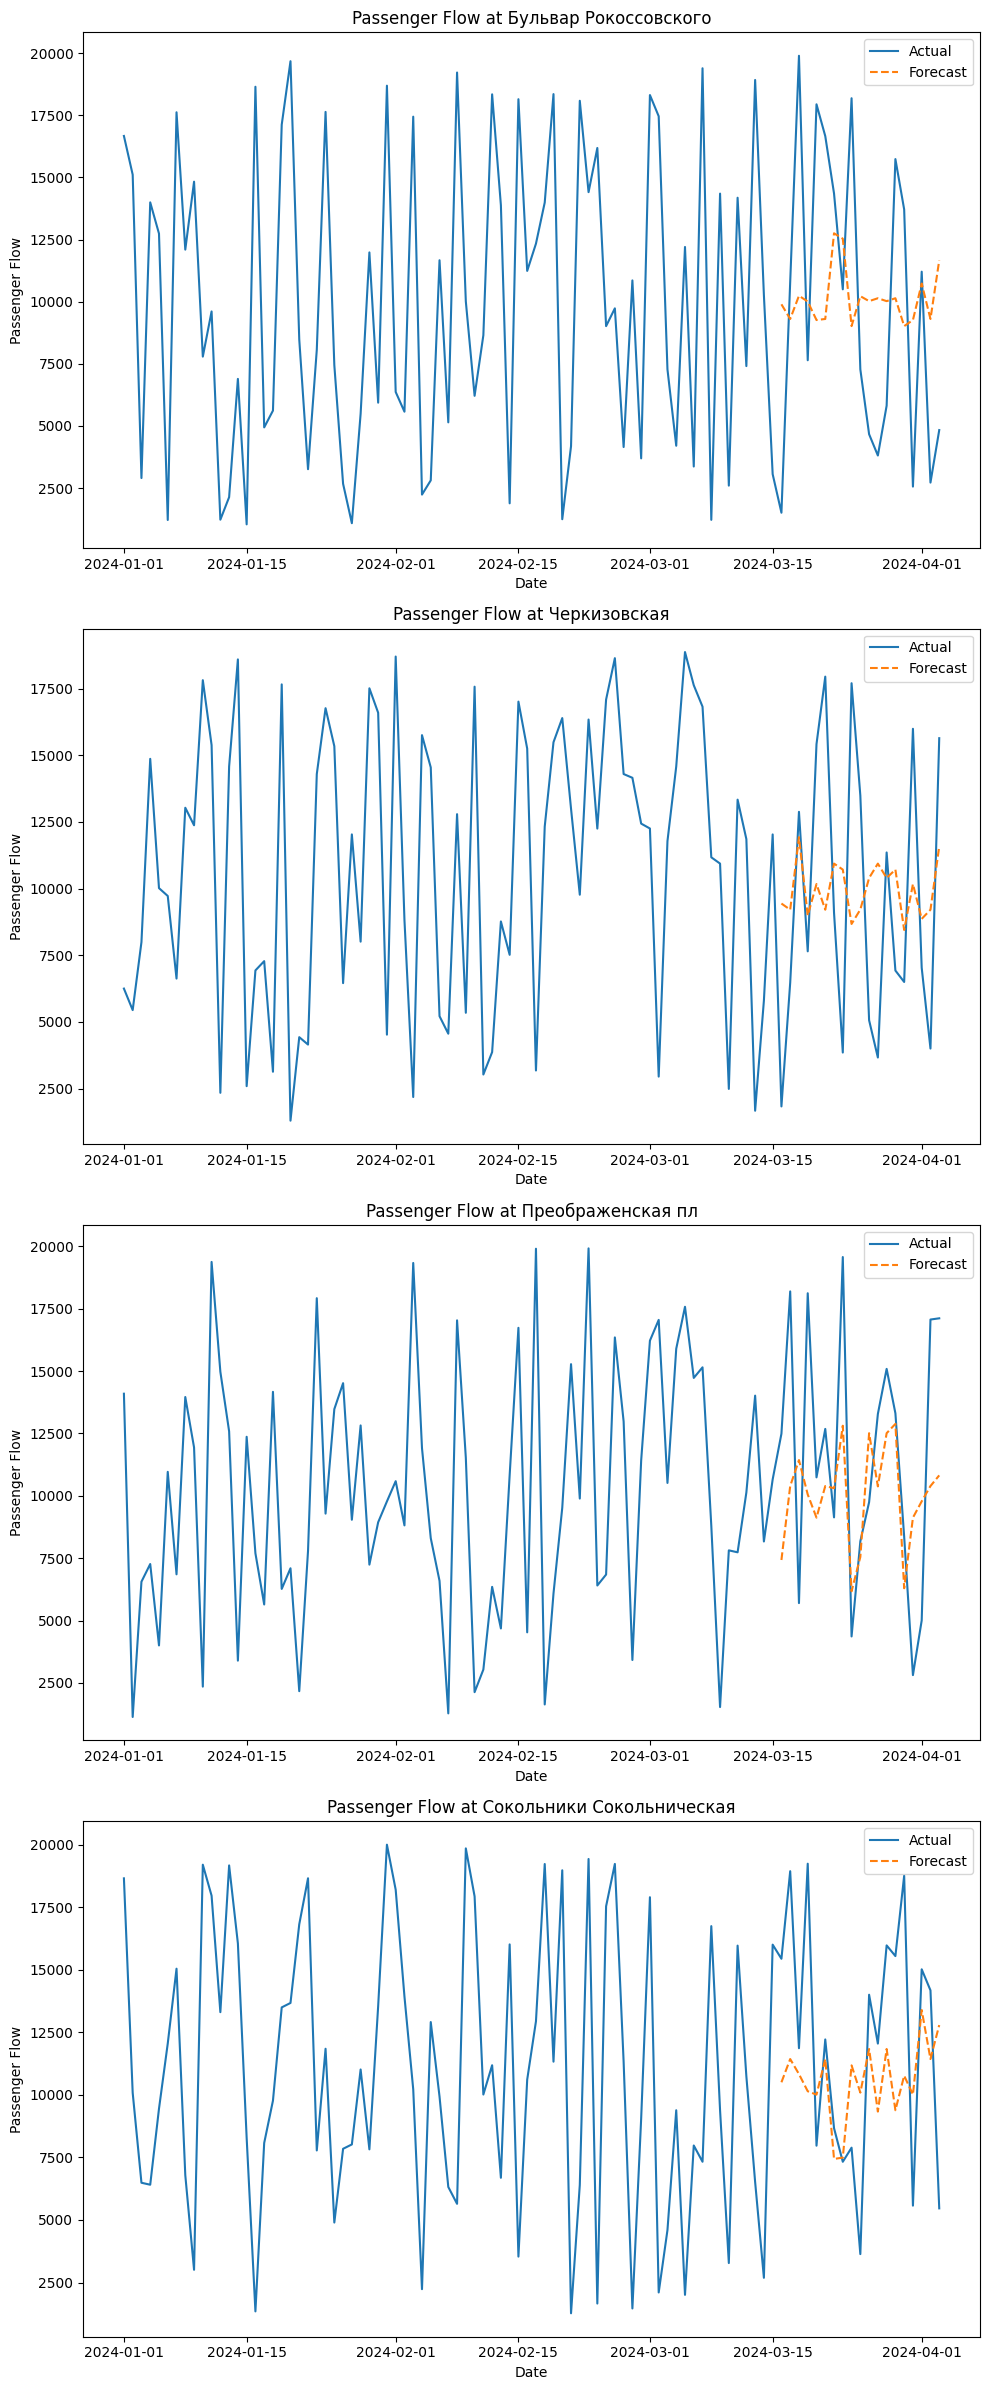

In [12]:
stations = df.columns[1:5]  

station_models={}

fig, axes = plt.subplots(len(stations), figsize=(10, 6*len(stations)))


for i, station in enumerate(stations):

    X = df[['day','weekday','weekend','month']]  
    y = df[station]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    model = LGBMRegressor()
    model.fit(X_train, y_train)



    y_pred = model.predict(X_test)


    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"MAPE for {station}: {mape}")


    axes[i].plot(df['Date'], y, label='Actual')
    axes[i].plot(df['Date'][-len(y_pred):], y_pred, label='Forecast', linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()

    station_models[station] = model


plt.tight_layout()

plt.show()


In [5]:
save_dir = 'modelsR'


stations = df.columns[1:] 

station_models={}


for i, station in enumerate(stations):
    
    X = df[['day','weekday','weekend','month']] 
    y = df[station]

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    

    filename = os.path.join(save_dir, f"{station}_model.joblib")
    joblib.dump(model, filename)


    station_models[station] = filename



In [6]:
filename = os.path.join('modelsR', f"{station}_model.joblib")
def find_future(days, station):
    loaded_models = {}
    for station_name, filename in station_models.items():
        loaded_models[station_name] = joblib.load(filename)
    
    model = loaded_models[station]
    
    date = df['Date'].max() + pd.Timedelta(days=days)
    
    dat = pd.DataFrame({'Date': [date]})
    dat['day'] = dat['Date'].dt.day
    dat['weekday'] = (dat['Date'].dt.dayofweek < 5).astype(int)
    dat['weekend'] = (dat['Date'].dt.dayofweek >= 5).astype(int)
    dat['month'] = dat['Date'].dt.month
    
    pred = model.predict(dat.iloc[:, 1:])
    prediction = int(round(pred[0]))
    
    return prediction, date


In [12]:
find_future(3,'Черкизовская')

(8961, Timestamp('2024-04-06 00:00:00'))